In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import time
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error,median_absolute_error,r2_score
from datetime import datetime

import plotnine
from plotnine import ggplot, aes, geom_line, scale_x_datetime, geom_point, xlab, ylab
from plotnine.scales.scale_color import scale_color_hue
from plotnine.facets.facet_grid import facet_grid

In [2]:
df = pd.read_csv("api_1.csv")
df.head(5)

,Date,Process CPU usage,Process memory usage,Request count,Reponse time
0,2022-10-21 12:00,3.83,6.26,316000.0,0.198
1,2022-10-21 13:00,5.01,6.27,436000.0,0.252
2,2022-10-21 14:00,4.38,6.29,376000.0,0.230
3,2022-10-21 15:00,4.34,6.29,378000.0,0.200
4,2022-10-21 16:00,3.77,6.30,312000.0,0.191


In [3]:
df.dropna(inplace=True)
df.columns = ['timestamp', 'cpu', 'memory', 'request', 'latency']
df['timestamp'] = df['timestamp'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M'))
df

,timestamp,cpu,memory,request,latency
0,2022-10-21 12:00:00,3.83,6.26,316000.0,0.198
1,2022-10-21 13:00:00,5.01,6.27,436000.0,0.252
2,2022-10-21 14:00:00,4.38,6.29,376000.0,0.230
3,2022-10-21 15:00:00,4.34,6.29,378000.0,0.200
4,2022-10-21 16:00:00,3.77,6.30,312000.0,0.191
...,...,...,...,...,...
2156,2023-01-19 08:00:00,1.27,3.26,204000.0,0.157
2157,2023-01-19 09:00:00,1.35,3.26,211000.0,0.153
2158,2023-01-19 10:00:00,1.44,3.27,235000.0,0.141
2159,2023-01-19 11:00:00,2.23,3.27,644000.0,0.104


In [4]:
plotnine.options.figure_size = (23, 4.8)

def plot_data(data, metric):
  return ggplot(data) + aes(x='timestamp', y=metric) + geom_line() + scale_x_datetime()

In [5]:
#separates 80% of this data
training_data_len = math.floor(len(df)*.8)

### Modelagem dos dados

Para começar a modelagem é necessário, primeiramente, definir as camadas da nossa rede neural convolucional. A primeira camada é a de entrada e onde será definida a convulação da rede neural, que arbitrariamente, definida como 48.

In [6]:
numerical_i = tf.keras.layers.Input((48,1))
numerical = tf.keras.layers.Conv1D(20,4)(numerical_i)
numerical = tf.keras.layers.Flatten()(numerical)
dense = tf.keras.layers.Dense(300,'relu')(numerical)
out=tf.keras.layers.Dense(48,'relu')(dense)

##CPU

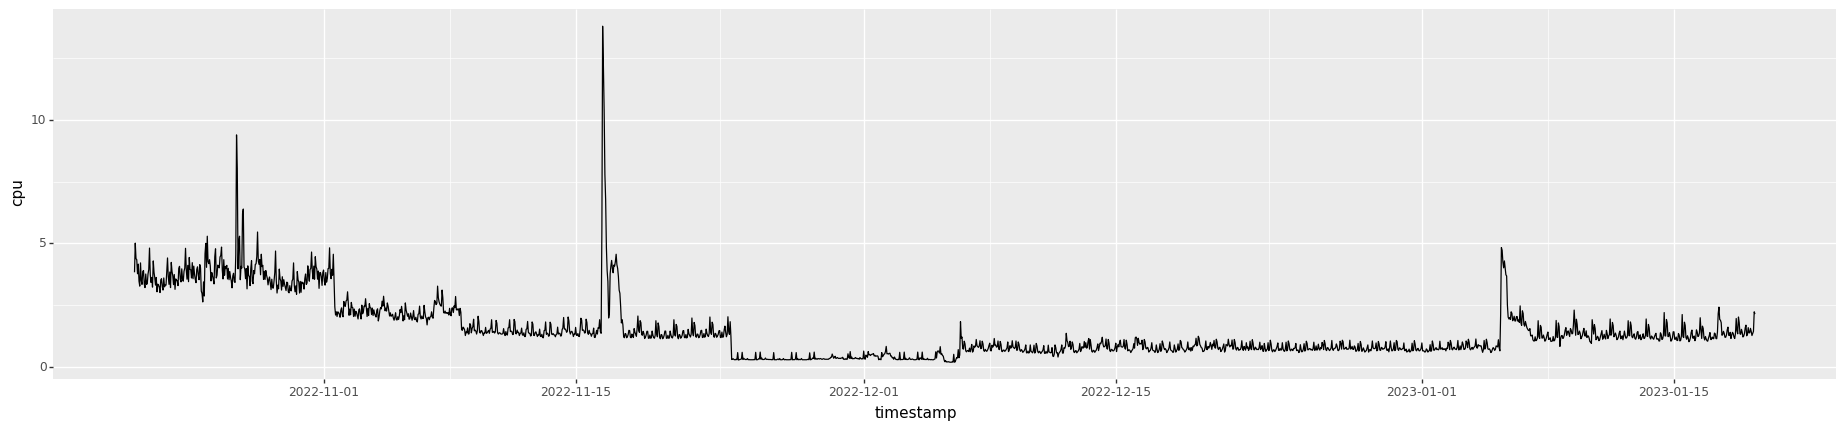

In [7]:
print(plot_data(df, 'cpu'))

In [8]:
##CPU
#creating a training dataset
train_cpu = pd.DataFrame(df[0:training_data_len]['timestamp'])
train_cpu['cpu'] = df[0:training_data_len]['cpu']
train_cpu.set_index('timestamp',inplace = True)

l=48
h=48

X_cpu=[]
Y_cpu=[]

for i in range(l,train_cpu.shape[0]-h):
  f=train_cpu.iloc[i-l:i]['cpu'].values
  y=train_cpu.iloc[i:i+h]['cpu'].values

  X_cpu.append(f)
  Y_cpu.append(y)

X_cpu=np.array(X_cpu)
Y_cpu=np.array(Y_cpu)

#creating the test base
test_cpu = pd.DataFrame(df[training_data_len:]['timestamp'])
test_cpu['cpu'] = df[training_data_len:]['cpu']
test_cpu.set_index('timestamp',inplace = True)

Xv_cpu=[]
Yv_cpu=[]

for i in range(l, test_cpu.shape[0]-h):
  f=test_cpu.iloc[i-l:i]['cpu'].values
  y=test_cpu.iloc[i:i+h]['cpu'].values

  Xv_cpu.append(f)
  Yv_cpu.append(y)

Xv_cpu=np.array(Xv_cpu)
Yv_cpu=np.array(Yv_cpu)

In [9]:
len(Xv_cpu)

337

In [10]:
start_cpu = time.time()

In [11]:
model_cpu=tf.keras.Model(numerical_i,out)
model_cpu.compile('adam','mae')
model_cpu.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 1)]           0         
                                                                 
 conv1d (Conv1D)             (None, 45, 20)            100       
                                                                 
 flatten (Flatten)           (None, 900)               0         
                                                                 
 dense (Dense)               (None, 300)               270300    
                                                                 
 dense_1 (Dense)             (None, 48)                14448     
                                                                 
Total params: 284,848
Trainable params: 284,848
Non-trainable params: 0
_________________________________________________________________


In [12]:
#Treinamento: 10 épocas para treinamento do modelo.
model_cpu.fit(X_cpu,Y_cpu,batch_size=1,shuffle=True,epochs=10)

Epoch 1/10
1632/1632 [==============================] - 11s 6ms/step - loss: 0.5812
Epoch 2/10
1632/1632 [==============================] - 8s 5ms/step - loss: 0.4372
Epoch 3/10
1632/1632 [==============================] - 10s 6ms/step - loss: 0.3760
Epoch 4/10
1632/1632 [==============================] - 10s 6ms/step - loss: 0.3271
Epoch 5/10
1632/1632 [==============================] - 10s 6ms/step - loss: 0.3057
Epoch 6/10
1632/1632 [==============================] - 7s 4ms/step - loss: 0.2862
Epoch 7/10
1632/1632 [==============================] - 8s 5ms/step - loss: 0.2813
Epoch 8/10
1632/1632 [==============================] - 7s 4ms/step - loss: 0.2768
Epoch 9/10
1632/1632 [==============================] - 8s 5ms/step - loss: 0.2772
Epoch 10/10
1632/1632 [==============================] - 8s 5ms/step - loss: 0.2703


In [13]:
#Gerando as previsões do modelo
predictions_cpu=model_cpu.predict(Xv_cpu)

11/11 [==============================] - 0s 4ms/step


In [14]:
p_base_cpu = np.ones(Yv_cpu.shape)*np.median(Y_cpu,axis=0)

In [15]:
end_cpu = time.time()

In [16]:
print('Erro médio absoluto :', mean_absolute_error(Yv_cpu, predictions_cpu))
print('Erro médio quadrado :', mean_squared_error(Yv_cpu, predictions_cpu))
print('Coeficiente de determinação (R²):', r2_score(Yv_cpu, predictions_cpu))
print("Tempo de execução:", end_cpu-start_cpu)

Erro médio absoluto : 0.2885934535338811
Erro médio quadrado : 0.3725311881696136
Coeficiente de determinação (R²): -0.2524965081102466
Tempo de execução: 143.31717157363892


Text(0, 0.5, 'Consumo')

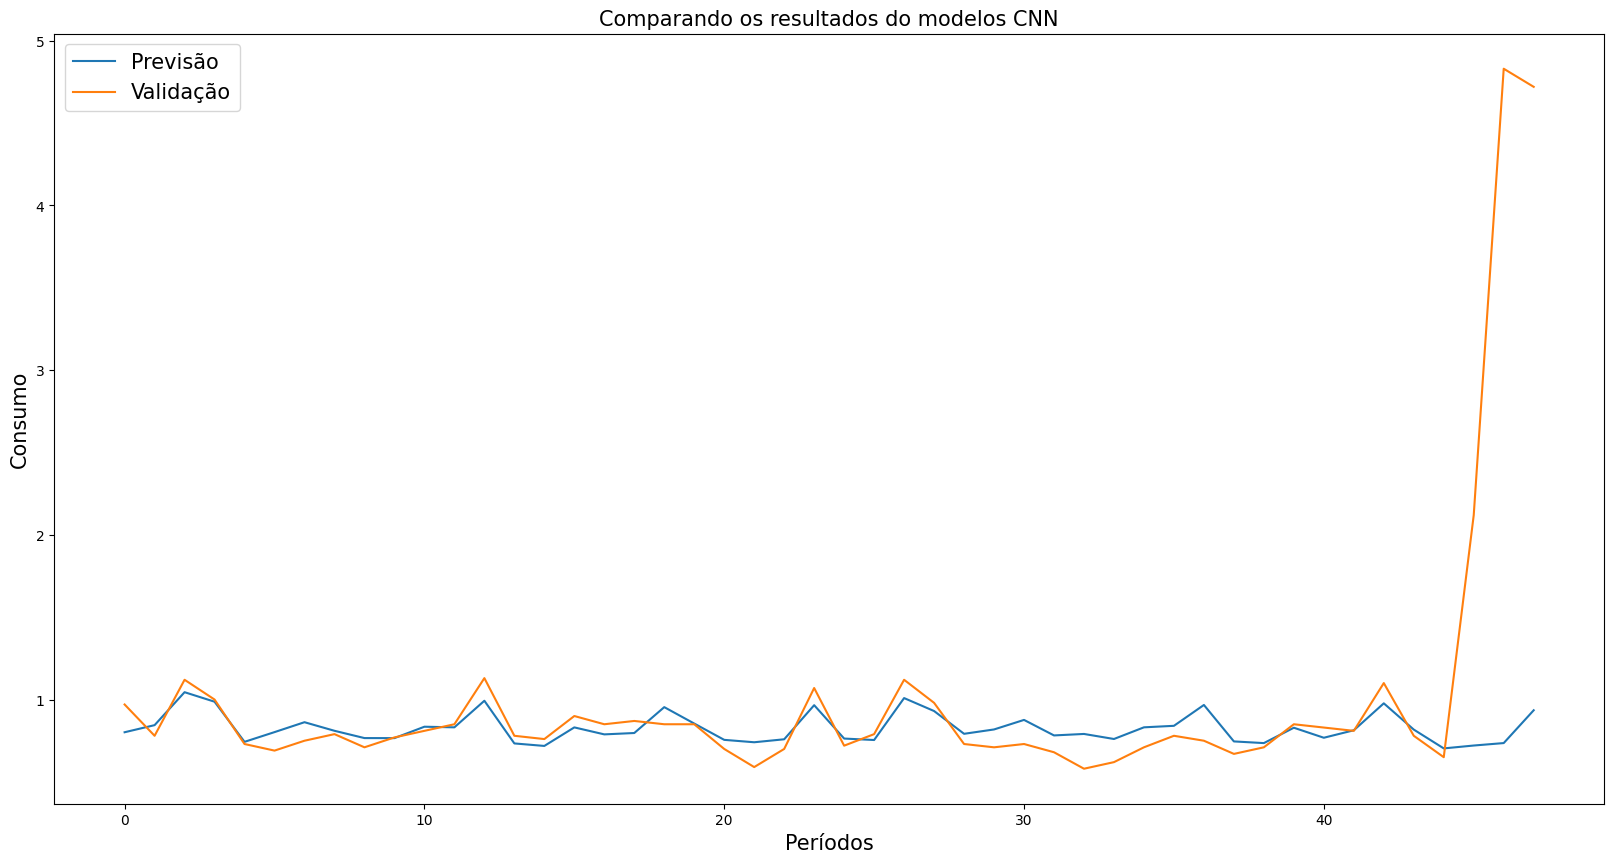

In [17]:
pd.DataFrame({'p':predictions_cpu[0,:], 'y':Yv_cpu[0,:]}).plot(figsize=(20,10))
plt.title('Comparando os resultados do modelos CNN',size=15)
plt.legend(['Previsão','Validação'],fontsize=15)
plt.xlabel('Períodos',size=15)
plt.ylabel('Consumo',size=15)

##MEMORY

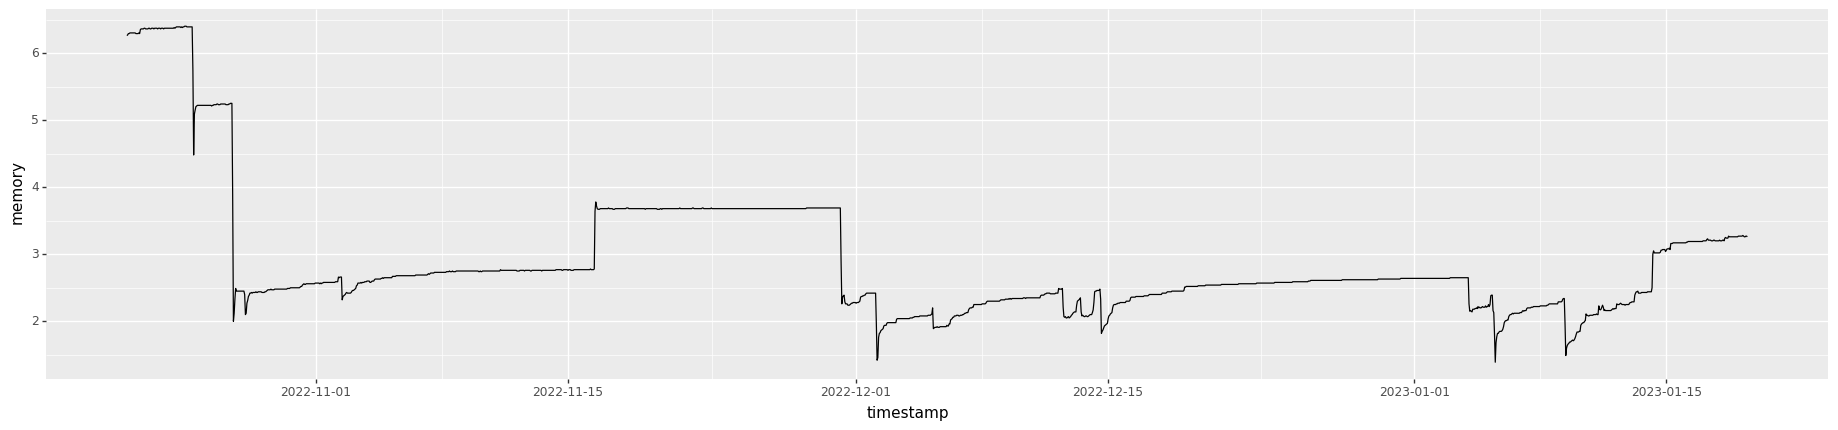

In [18]:
print(plot_data(df, 'memory'))

In [19]:
##MEMORY
#creating a training dataset
train_memory = pd.DataFrame(df[0:training_data_len]['timestamp'])
train_memory['memory'] = df[0:training_data_len]['memory']
train_memory.set_index('timestamp',inplace = True)

l=48
h=48

X_memory=[]
Y_memory=[]

for i in range(l,train_memory.shape[0]-h):
  f=train_memory.iloc[i-l:i]['memory'].values
  y=train_memory.iloc[i:i+h]['memory'].values

  X_memory.append(f)
  Y_memory.append(y)

X_memory=np.array(X_memory)
Y_memory=np.array(Y_memory)

#creating the test base
test_memory = pd.DataFrame(df[training_data_len:]['timestamp'])
test_memory['memory'] = df[training_data_len:]['memory']
test_memory.set_index('timestamp',inplace = True)

Xv_memory=[]
Yv_memory=[]

for i in range(l, test_memory.shape[0]-h):
  f=test_memory.iloc[i-l:i]['memory'].values
  y=test_memory.iloc[i:i+h]['memory'].values

  Xv_memory.append(f)
  Yv_memory.append(y)

Xv_memory=np.array(Xv_memory)
Yv_memory=np.array(Yv_memory)

In [20]:
start_memory = time.time()

In [21]:
model_memory=tf.keras.Model(numerical_i,out)
model_memory.compile('adam','mae')
model_memory.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 1)]           0         
                                                                 
 conv1d (Conv1D)             (None, 45, 20)            100       
                                                                 
 flatten (Flatten)           (None, 900)               0         
                                                                 
 dense (Dense)               (None, 300)               270300    
                                                                 
 dense_1 (Dense)             (None, 48)                14448     
                                                                 
Total params: 284,848
Trainable params: 284,848
Non-trainable params: 0
_________________________________________________________________


In [22]:
#Treinamento: 10 épocas para treinamento do modelo.
model_memory.fit(X_memory,Y_memory,batch_size=1,shuffle=True,epochs=10)

Epoch 1/10
1632/1632 [==============================] - 8s 5ms/step - loss: 0.1810
Epoch 2/10
1632/1632 [==============================] - 8s 5ms/step - loss: 0.1737
Epoch 3/10
1632/1632 [==============================] - 8s 5ms/step - loss: 0.1693
Epoch 4/10
1632/1632 [==============================] - 7s 5ms/step - loss: 0.1662
Epoch 5/10
1632/1632 [==============================] - 9s 6ms/step - loss: 0.1663
Epoch 6/10
1632/1632 [==============================] - 8s 5ms/step - loss: 0.1690
Epoch 7/10
1632/1632 [==============================] - 8s 5ms/step - loss: 0.1672
Epoch 8/10
1632/1632 [==============================] - 8s 5ms/step - loss: 0.1643
Epoch 9/10
1632/1632 [==============================] - 7s 5ms/step - loss: 0.1672
Epoch 10/10
1632/1632 [==============================] - 8s 5ms/step - loss: 0.1624


In [23]:
#Gerando as previsões do modelo
predictions_memory=model_memory.predict(Xv_memory)

11/11 [==============================] - 0s 2ms/step


In [24]:
p_base_memory = np.ones(Yv_memory.shape)*np.median(Y_memory,axis=0)

In [25]:
end_memory = time.time()

In [26]:
print('Erro médio absoluto :', mean_absolute_error(Yv_memory, predictions_memory))
print('Erro médio quadrado :', mean_squared_error(Yv_memory, predictions_memory))
print('Coeficiente de determinação (R²):', r2_score(Yv_memory, predictions_memory))
print("Tempo de execução:", end_memory-start_memory)

Erro médio absoluto : 0.18089762742895518
Erro médio quadrado : 0.08098301531430432
Coeficiente de determinação (R²): 0.6792057569481279
Tempo de execução: 81.74004793167114


Text(0, 0.5, 'Consumo')

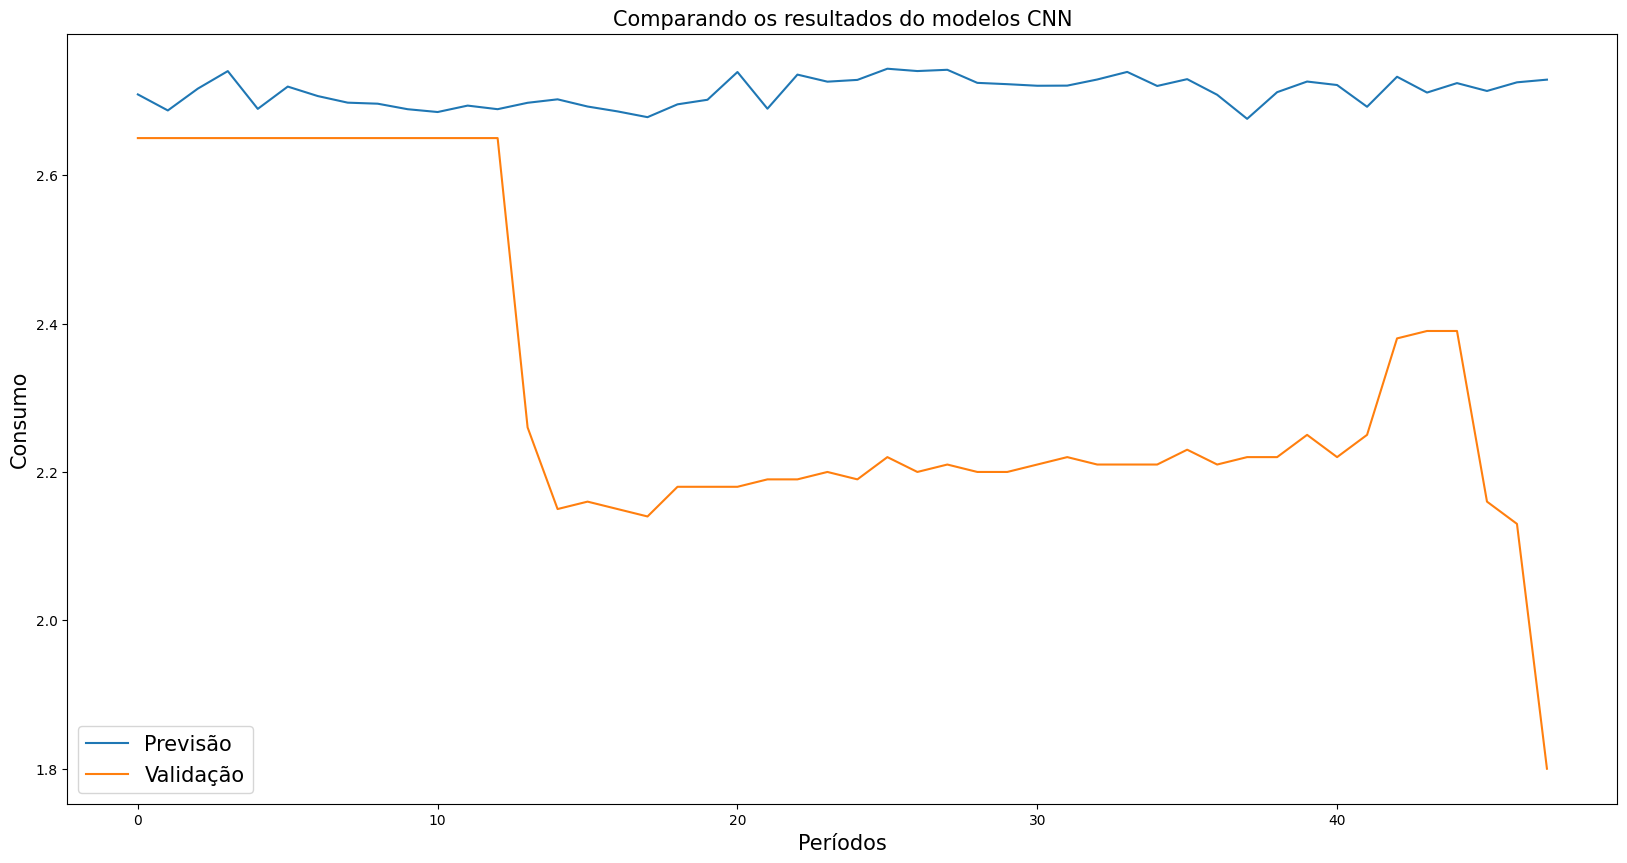

In [27]:
pd.DataFrame({'p':predictions_memory[0,:], 'y':Yv_memory[0,:]}).plot(figsize=(20,10))
plt.title('Comparando os resultados do modelos CNN',size=15)
plt.legend(['Previsão','Validação'],fontsize=15)
plt.xlabel('Períodos',size=15)
plt.ylabel('Consumo',size=15)

##REQUEST

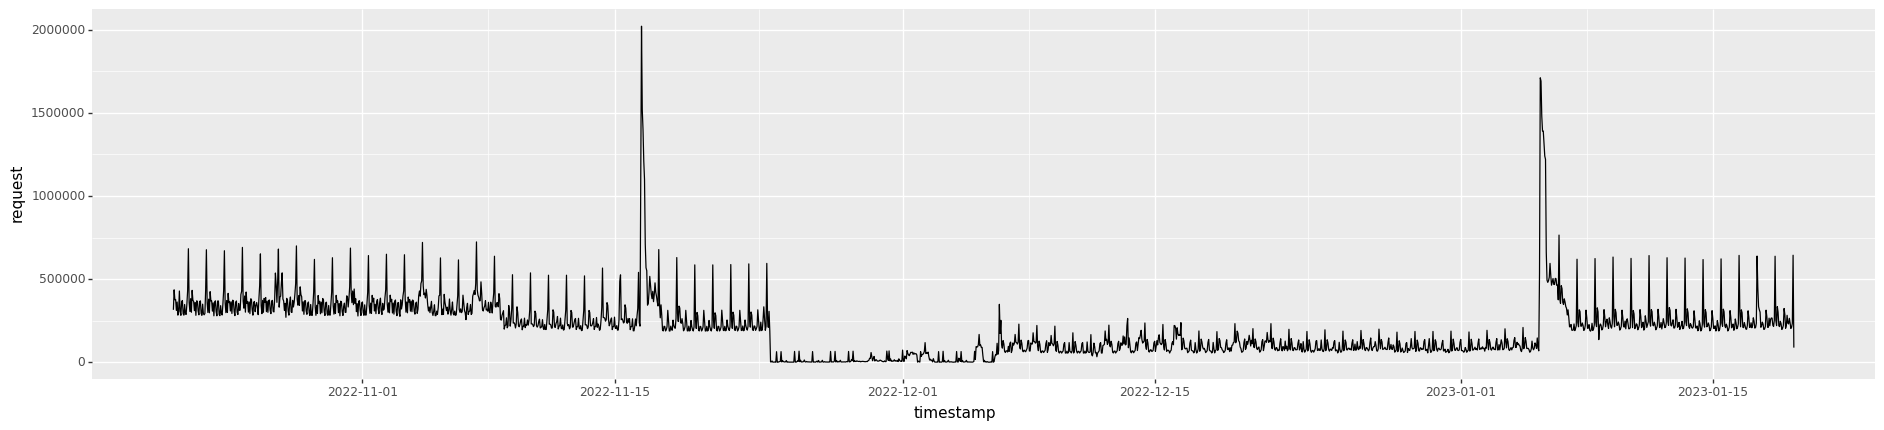

In [28]:
print(plot_data(df, 'request'))

In [29]:
##REQUEST
#creating a training dataset
train_request = pd.DataFrame(df[0:training_data_len]['timestamp'])
train_request['request'] = df[0:training_data_len]['request']
train_request.set_index('timestamp',inplace = True)

l=48
h=48

X_request=[]
Y_request=[]

for i in range(l,train_request.shape[0]-h):
  f=train_request.iloc[i-l:i]['request'].values
  y=train_request.iloc[i:i+h]['request'].values

  X_request.append(f)
  Y_request.append(y)

X_request=np.array(X_request)
Y_request=np.array(Y_request)

#creating the test base
test_request = pd.DataFrame(df[training_data_len:]['timestamp'])
test_request['request'] = df[training_data_len:]['request']
test_request.set_index('timestamp',inplace = True)

Xv_request=[]
Yv_request=[]

for i in range(l, test_request.shape[0]-h):
  f=test_request.iloc[i-l:i]['request'].values
  y=test_request.iloc[i:i+h]['request'].values

  Xv_request.append(f)
  Yv_request.append(y)

Xv_request=np.array(Xv_request)
Yv_request=np.array(Yv_request)

In [30]:
start_request = time.time()

In [31]:
model_request=tf.keras.Model(numerical_i,out)
model_request.compile('adam','mae')
model_request.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 1)]           0         
                                                                 
 conv1d (Conv1D)             (None, 45, 20)            100       
                                                                 
 flatten (Flatten)           (None, 900)               0         
                                                                 
 dense (Dense)               (None, 300)               270300    
                                                                 
 dense_1 (Dense)             (None, 48)                14448     
                                                                 
Total params: 284,848
Trainable params: 284,848
Non-trainable params: 0
_________________________________________________________________


In [32]:
#Treinamento: 10 épocas para treinamento do modelo.
model_request.fit(X_request,Y_request,batch_size=1,shuffle=True,epochs=10)

Epoch 1/10
1632/1632 [==============================] - 9s 5ms/step - loss: 44294.4844
Epoch 2/10
1632/1632 [==============================] - 7s 4ms/step - loss: 39557.7500
Epoch 3/10
1632/1632 [==============================] - 8s 5ms/step - loss: 37697.7930
Epoch 4/10
1632/1632 [==============================] - 8s 5ms/step - loss: 36583.5117
Epoch 5/10
1632/1632 [==============================] - 7s 4ms/step - loss: 36317.7266
Epoch 6/10
1632/1632 [==============================] - 8s 5ms/step - loss: 35915.1211
Epoch 7/10
1632/1632 [==============================] - 7s 4ms/step - loss: 35207.3281
Epoch 8/10
1632/1632 [==============================] - 8s 5ms/step - loss: 34773.2930
Epoch 9/10
1632/1632 [==============================] - 8s 5ms/step - loss: 34515.0117
Epoch 10/10
1632/1632 [==============================] - 7s 4ms/step - loss: 34596.4297


In [33]:
#Gerando as previsões do modelo
predictions_request=model_request.predict(Xv_request)

11/11 [==============================] - 0s 2ms/step


In [34]:
p_base_request = np.ones(Yv_request.shape)*np.median(Y_request,axis=0)

In [35]:
end_request = time.time()

In [36]:
print('Erro médio absoluto :', mean_absolute_error(Yv_request, predictions_request))
print('Erro médio quadrado :', mean_squared_error(Yv_request, predictions_request))
print('Coeficiente de determinação (R²):', r2_score(Yv_request, predictions_request))
print("Tempo de execução:", end_request-start_request)

Erro médio absoluto : 98351.40521119493
Erro médio quadrado : 60711415716.328674
Coeficiente de determinação (R²): -0.365283747149153
Tempo de execução: 82.88549828529358


Text(0, 0.5, 'Consumo')

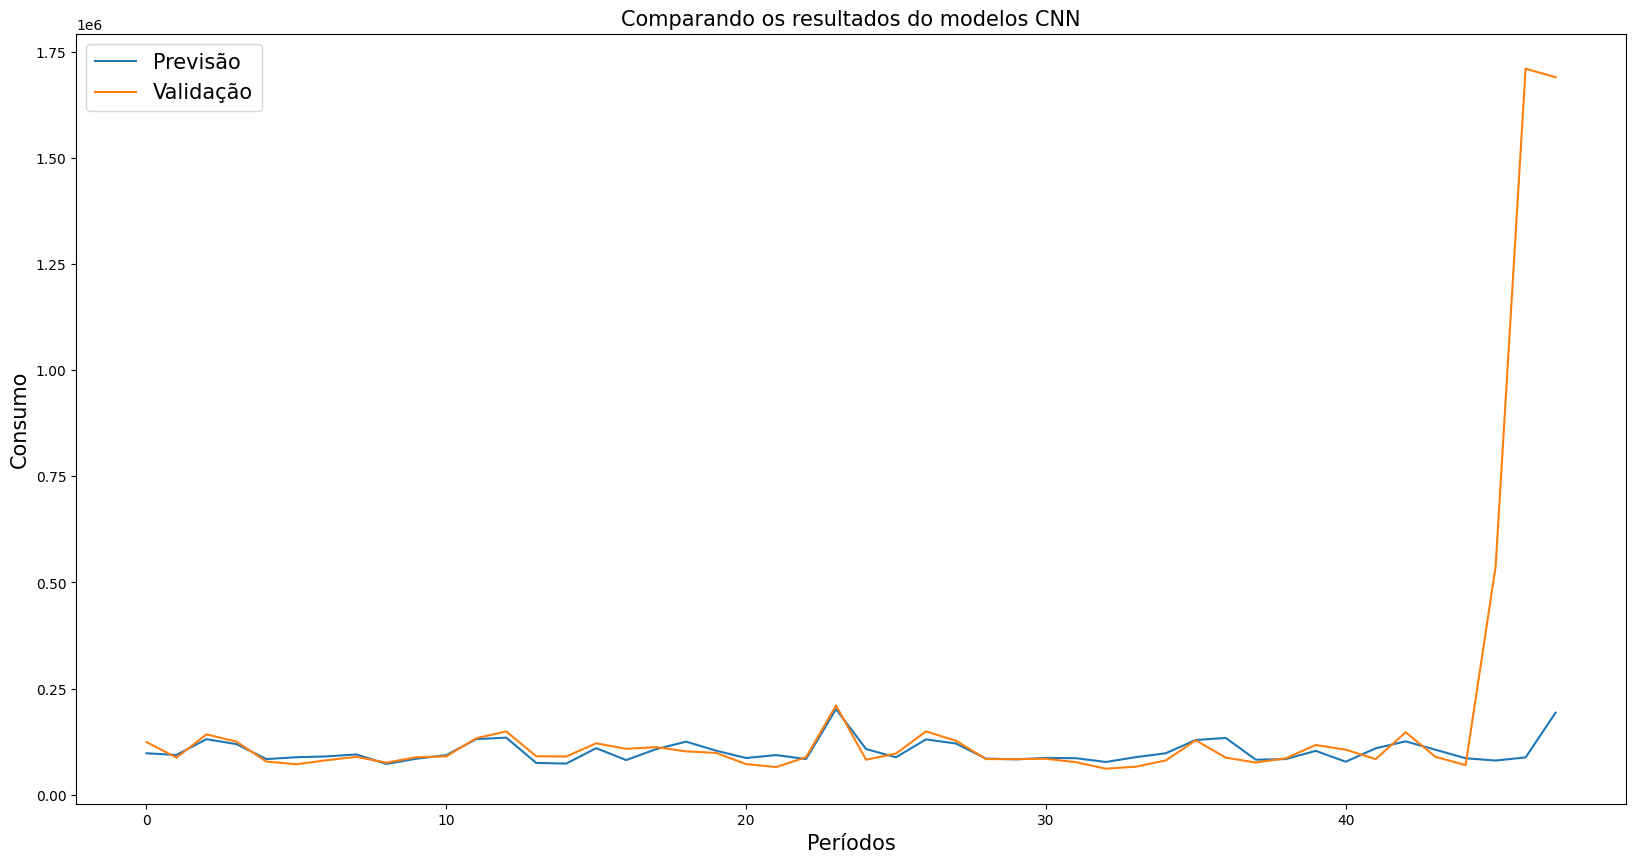

In [37]:
pd.DataFrame({'p':predictions_request[0,:], 'y':Yv_request[0,:]}).plot(figsize=(20,10))
plt.title('Comparando os resultados do modelos CNN',size=15)
plt.legend(['Previsão','Validação'],fontsize=15)
plt.xlabel('Períodos',size=15)
plt.ylabel('Consumo',size=15)

##LATENCY

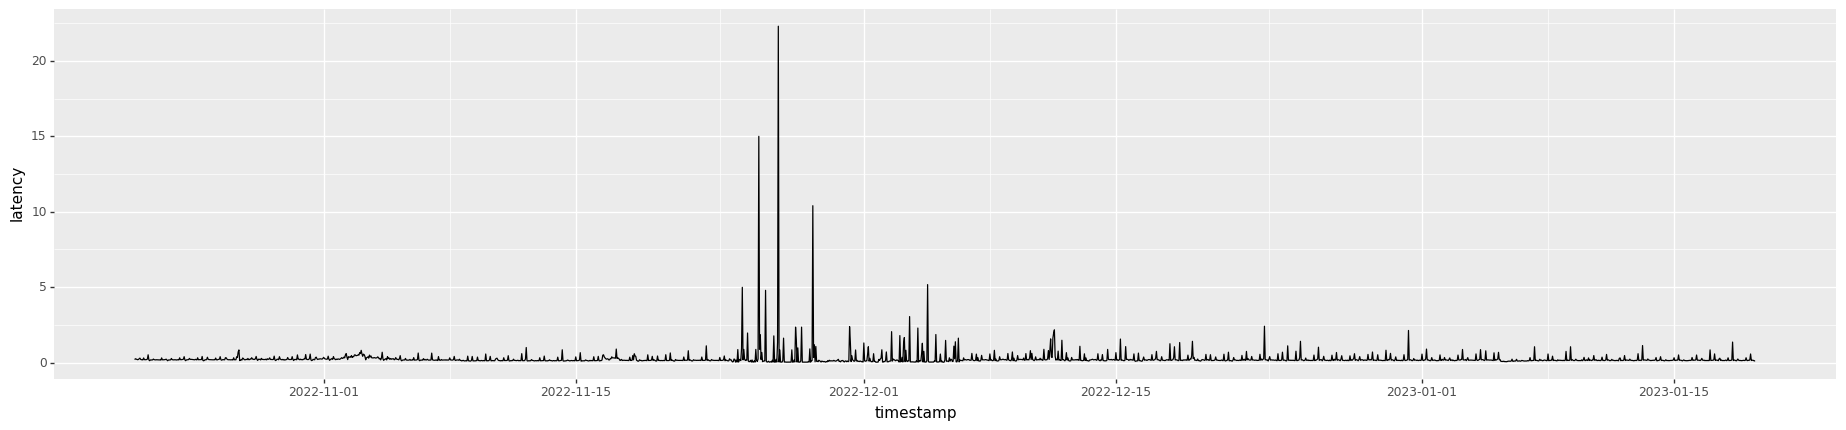

In [38]:
print(plot_data(df, 'latency'))

In [39]:
##LATENCY
#creating a training dataset
train_latency = pd.DataFrame(df[0:training_data_len]['timestamp'])
train_latency['latency'] = df[0:training_data_len]['latency']
train_latency.set_index('timestamp',inplace = True)

l=48
h=48

X_latency=[]
Y_latency=[]

for i in range(l,train_latency.shape[0]-h):
  f=train_latency.iloc[i-l:i]['latency'].values
  y=train_latency.iloc[i:i+h]['latency'].values

  X_latency.append(f)
  Y_latency.append(y)

X_latency=np.array(X_latency)
Y_latency=np.array(Y_latency)

#creating the test base
test_latency = pd.DataFrame(df[training_data_len:]['timestamp'])
test_latency['latency'] = df[training_data_len:]['latency']
test_latency.set_index('timestamp',inplace = True)

Xv_latency=[]
Yv_latency=[]

for i in range(l, test_latency.shape[0]-h):
  f=test_latency.iloc[i-l:i]['latency'].values
  y=test_latency.iloc[i:i+h]['latency'].values

  Xv_latency.append(f)
  Yv_latency.append(y)

Xv_latency=np.array(Xv_latency)
Yv_latency=np.array(Yv_latency)

In [40]:
start_latency = time.time()

In [41]:
model_latency=tf.keras.Model(numerical_i,out)
model_latency.compile('adam','mae')
model_latency.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 1)]           0         
                                                                 
 conv1d (Conv1D)             (None, 45, 20)            100       
                                                                 
 flatten (Flatten)           (None, 900)               0         
                                                                 
 dense (Dense)               (None, 300)               270300    
                                                                 
 dense_1 (Dense)             (None, 48)                14448     
                                                                 
Total params: 284,848
Trainable params: 284,848
Non-trainable params: 0
_________________________________________________________________


In [42]:
#Treinamento: 10 épocas para treinamento do modelo.
model_latency.fit(X_latency,Y_latency,batch_size=1,shuffle=True,epochs=10)

Epoch 1/10
1632/1632 [==============================] - 12s 7ms/step - loss: 0.2915
Epoch 2/10
1632/1632 [==============================] - 7s 4ms/step - loss: 0.2755
Epoch 3/10
1632/1632 [==============================] - 8s 5ms/step - loss: 0.2755
Epoch 4/10
1632/1632 [==============================] - 7s 4ms/step - loss: 0.2755
Epoch 5/10
1632/1632 [==============================] - 8s 5ms/step - loss: 0.2755
Epoch 6/10
1632/1632 [==============================] - 7s 5ms/step - loss: 0.2755
Epoch 7/10
1632/1632 [==============================] - 7s 5ms/step - loss: 0.2755
Epoch 8/10
1632/1632 [==============================] - 8s 5ms/step - loss: 0.2755
Epoch 9/10
1632/1632 [==============================] - 7s 4ms/step - loss: 0.2755
Epoch 10/10
1632/1632 [==============================] - 8s 5ms/step - loss: 0.2755


In [43]:
#Gerando as previsões do modelo
predictions_latency=model_latency.predict(Xv_latency)

11/11 [==============================] - 0s 2ms/step


In [44]:
p_base_latency = np.ones(Yv_latency.shape)*np.median(Y_latency,axis=0)

In [45]:
end_latency = time.time()

In [46]:
print('Erro médio absoluto :', mean_absolute_error(Yv_latency, predictions_latency))
print('Erro médio quadrado :', mean_squared_error(Yv_latency, predictions_latency))
print('Coeficiente de determinação (R²):', r2_score(Yv_latency, predictions_latency))
print("Tempo de execução:", end_latency-start_latency)

Erro médio absoluto : 0.18135550197823938
Erro médio quadrado : 0.053103074019535124
Coeficiente de determinação (R²): -1.6310999534315689
Tempo de execução: 82.93330883979797


Text(0, 0.5, 'Consumo')

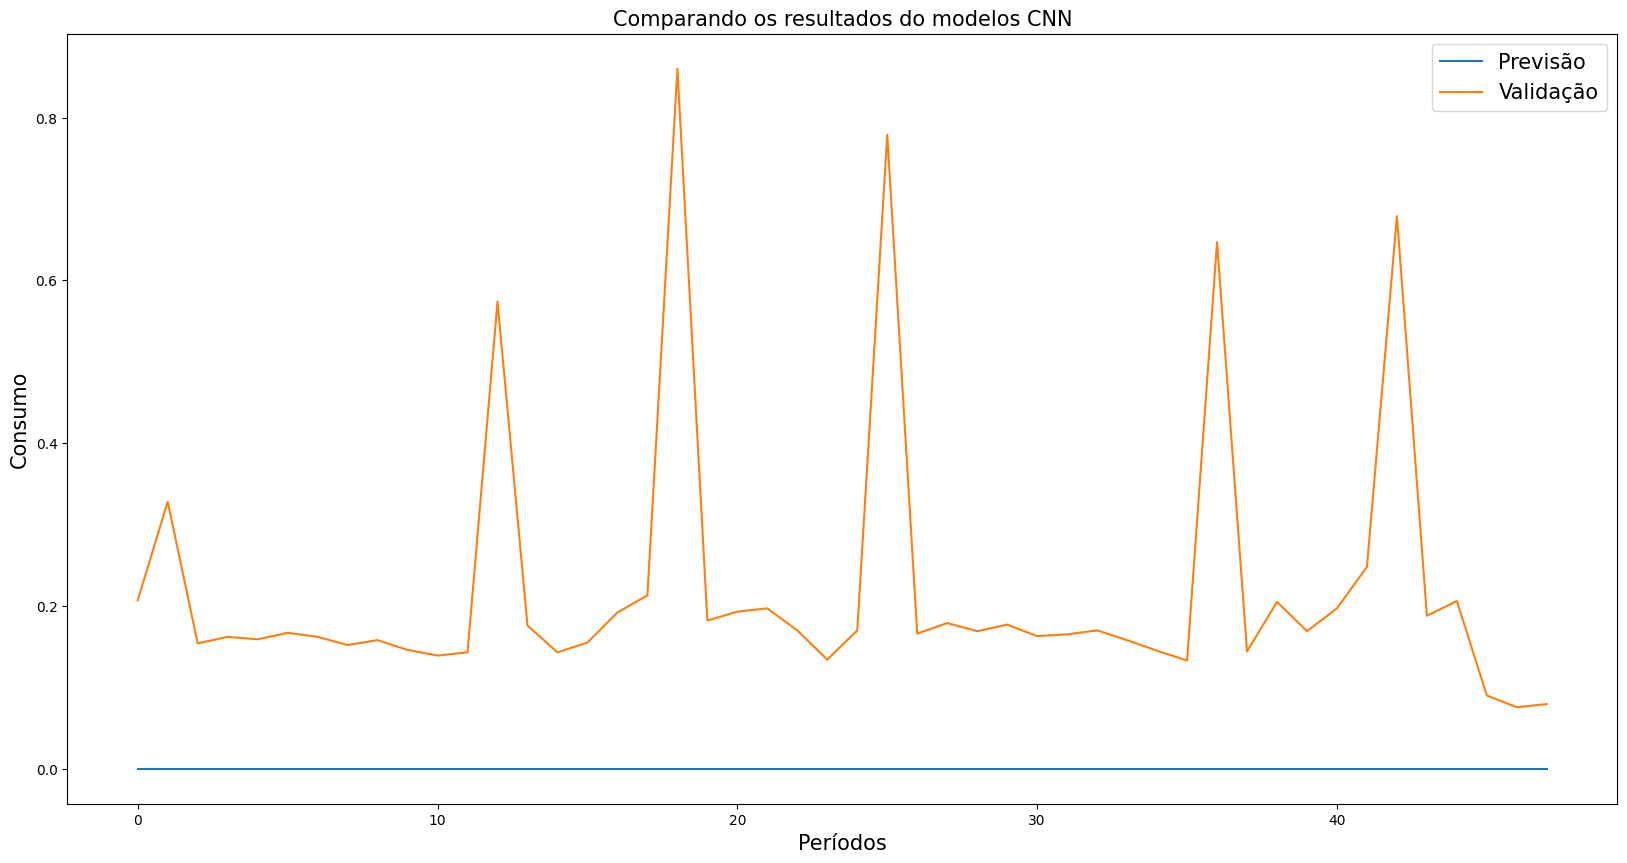

In [47]:
pd.DataFrame({'p':predictions_latency[0,:], 'y':Yv_latency[0,:]}).plot(figsize=(20,10))
plt.title('Comparando os resultados do modelos CNN',size=15)
plt.legend(['Previsão','Validação'],fontsize=15)
plt.xlabel('Períodos',size=15)
plt.ylabel('Consumo',size=15)